In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [ ]:
customer = pd.read_csv(r'/content/customers.csv')
event = pd.read_csv(r'/content/events.csv')
order = pd.read_csv(r'/content/orders.csv')
items = pd.read_csv(r'/content/line_items.csv')
product = pd.read_csv(r'/content/products.csv')

In [ ]:
product.head()
#customer.info()
#customer.describe()

,id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99


## Merging Dataset

In [ ]:
merged_data = pd.merge(customer,event, on='customer_id', how='inner')
merged_data = pd.merge(merged_data,order, on='customer_id',how='inner')
merged_data = pd.merge(merged_data, items, on='order_id', how='inner')
merged_data = pd.merge(merged_data, product, left_on='item_id', right_on='id', how='inner')

## Handling Missing Values

In [ ]:
merged_data.isnull().sum()

,0
customer_id,0
device_id,0
location,0
currency,0
event_id,0
event_data,0
event_timestamp,0
order_id,0
status,0
checked_out_at,0


In [ ]:
merged_data.columns = [col.lower().strip().replace(' ', '_') for col in merged_data.columns]

In [ ]:
merged_data.shape

(578320, 16)

In [ ]:
merged_data.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4,5,Nike Air Max 270,129.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5,9,Nintendo Switch,299.99
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1,12,Coca-Cola 12-Pack,5.99
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2,6,Adidas Ultraboost,180.00


In [ ]:
merged_data.drop_duplicates(inplace=True)

In [ ]:
merged_data.to_csv('merged_data.csv', index=False)

## Questions
##  a. Visit Frequency:
## How often does this customer visit the website, based on the provided data?
## Can you identify any patterns or trends in the customer's visit frequency?
## b. Location Analysis:
## What is the customer's location based on the provided data?
## How might the customer's location influence their purchasing behavior?
## c. Overall Purchase Behavior:
## Based on the data provided, what insights can you draw about this customer's overall behavior on the website?
## How might these insights inform marketing strategies or personalized recommendations for this customer?



In [ ]:
merged_data['event_timestamp'] = pd.to_datetime(merged_data['event_timestamp'])

In [ ]:
visit_frequency = merged_data.groupby('customer_id')['event_timestamp'].count().reset_index()
visit_frequency.rename(columns={'event_timestamp': 'visit_frequency'}, inplace=True)
merged_data = pd.merge(merged_data, visit_frequency, on='customer_id', how='left')
visit_frequency

,customer_id,visit_frequency
0,00096d0c-ced3-4913-afe9-5ce363f7126f,253
1,000c7914-248f-404c-bd49-49c7ae49364e,275
2,000d9458-f109-4fd1-9bc9-2514dde6c7d2,288
3,000e74fd-2f7f-447c-9fe5-a0e856e3e93f,12
4,001c37e2-f25c-45c1-8326-1ddf73c21dde,42
...,...,...
4589,ffaf35ad-37fa-43f1-bed3-26bb53e612ae,133
4590,ffc51ce7-426f-4e93-b98e-21be2202b40e,200
4591,ffda8205-bed4-4067-b4f6-8ed1b4819c64,78
4592,ffddb31d-9c3e-46b7-9ec2-efd272f6bd51,98


In [ ]:
merged_data['last_visit'] = merged_data.groupby('customer_id')['event_timestamp'].transform('max')
today = pd.Timestamp.now()
merged_data['recency'] = (today - merged_data['last_visit']).dt.days

In [ ]:
preferred_category = merged_data.groupby('customer_id')['name'].agg(lambda x: x.value_counts().idxmax()).reset_index()
preferred_category.rename(columns={'name': 'preferred_category'}, inplace=True)
merged_data = pd.merge(merged_data, preferred_category, on='customer_id', how='left')
preferred_category

,customer_id,preferred_category
0,00096d0c-ced3-4913-afe9-5ce363f7126f,Coca-Cola 12-Pack
1,000c7914-248f-404c-bd49-49c7ae49364e,Nintendo Switch
2,000d9458-f109-4fd1-9bc9-2514dde6c7d2,Samsung Galaxy S21
3,000e74fd-2f7f-447c-9fe5-a0e856e3e93f,Dell XPS 13 Laptop
4,001c37e2-f25c-45c1-8326-1ddf73c21dde,Nintendo Switch
...,...,...
4589,ffaf35ad-37fa-43f1-bed3-26bb53e612ae,Adidas Ultraboost
4590,ffc51ce7-426f-4e93-b98e-21be2202b40e,Adidas Ultraboost
4591,ffda8205-bed4-4067-b4f6-8ed1b4819c64,Starbucks Coffee Beans
4592,ffddb31d-9c3e-46b7-9ec2-efd272f6bd51,iPhone 13


In [ ]:
# 5. Location-Based Insights
location_data = merged_data.groupby('location')['price'].sum().reset_index()
location_data.rename(columns={'price': 'location_total'}, inplace=True)
merged_data = pd.merge(merged_data, location_data, on='location', how='left')
location_data

,location,location_total
0,Afghanistan,1599882.86
1,Albania,2616473.17
2,Algeria,1201012.33
3,American Samoa,1168791.48
4,Andorra,2020906.52
...,...,...
238,Wallis and Futuna,1217759.26
239,Western Sahara,1454831.54
240,Yemen,1005931.74
241,Zambia,1213199.25


b. Location Analysis:
What is the customer's location based on the provided data?
How might the customer's location influence their purchasing behavior?

In [ ]:
#lets start by sorting out in one place the columns on the datasheet

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         578320 non-null  object        
 1   device_id           578320 non-null  object        
 2   location            578320 non-null  object        
 3   currency            578320 non-null  object        
 4   event_id            578320 non-null  int64         
 5   event_data          578320 non-null  object        
 6   event_timestamp     578320 non-null  datetime64[ns]
 7   order_id            578320 non-null  object        
 8   status              578320 non-null  object        
 9   checked_out_at      578320 non-null  object        
 10  line_item_id        578320 non-null  int64         
 11  item_id             578320 non-null  int64         
 12  quantity            578320 non-null  int64         
 13  id                  578320 no

In [ ]:
#Identifying Customer Location

customer_locations = merged_data.groupby('customer_id')['location'].unique().reset_index()
customer_locations.rename(columns={'location': 'customer_location'}, inplace=True)
print(customer_locations)

                               customer_id   customer_location
0     00096d0c-ced3-4913-afe9-5ce363f7126f          [Thailand]
1     000c7914-248f-404c-bd49-49c7ae49364e              [Fiji]
2     000d9458-f109-4fd1-9bc9-2514dde6c7d2           [Finland]
3     000e74fd-2f7f-447c-9fe5-a0e856e3e93f          [Cambodia]
4     001c37e2-f25c-45c1-8326-1ddf73c21dde  [Christmas Island]
...                                    ...                 ...
4589  ffaf35ad-37fa-43f1-bed3-26bb53e612ae         [Singapore]
4590  ffc51ce7-426f-4e93-b98e-21be2202b40e            [Uganda]
4591  ffda8205-bed4-4067-b4f6-8ed1b4819c64             [Congo]
4592  ffddb31d-9c3e-46b7-9ec2-efd272f6bd51          [Malaysia]
4593  ffef23aa-84f4-45ba-96cc-2c4377220305            [Norway]

[4594 rows x 2 columns]


In [ ]:
#Next we Analyzing Location Influence on Purchasing Behavior

location_influence = merged_data.groupby('location')['price'].agg(['sum', 'mean', 'count']).reset_index()
location_influence.rename(columns={'sum': 'total_spent', 'mean': 'avg_order_value', 'count': 'num_orders'}, inplace=True)
print(location_influence)

              location  total_spent  avg_order_value  num_orders
0          Afghanistan   1599882.86       801.946296        1995
1              Albania   2616473.17       703.163980        3721
2              Algeria   1201012.33       652.015380        1842
3       American Samoa   1168791.48       694.881974        1682
4              Andorra   2020906.52       758.598544        2664
..                 ...          ...              ...         ...
238  Wallis and Futuna   1217759.26       693.090074        1757
239     Western Sahara   1454831.54       752.239679        1934
240              Yemen   1005931.74       726.829292        1384
241             Zambia   1213199.25       754.477146        1608
242           Zimbabwe   1217643.85       648.718087        1877

[243 rows x 4 columns]


In [ ]:
#Product preferences by location
#Lets Analyze which product categories are more popular in different locations.

location_preferences = merged_data.groupby(['location', 'name'])['order_id'].count().reset_index()
location_preferences.rename(columns={'order_id': 'purchase_count'}, inplace=True)


In [ ]:
#The most popular product category for each location


popular_products_by_location = location_preferences.loc[location_preferences.groupby('location')['purchase_count'].idxmax()]

print(popular_products_by_location)

               location                         name  purchase_count
2           Afghanistan          Canon EOS R5 Camera             185
25              Albania           Samsung Galaxy S21             329
41              Algeria           Sony PlayStation 5             169
54       American Samoa  Samsung 55-Inch 4K Smart TV             156
68              Andorra              Nintendo Switch             230
...                 ...                          ...             ...
3584  Wallis and Futuna                    iPhone 13             176
3597     Western Sahara   Sony WH-1000XM4 Headphones             184
3605              Yemen              Fitbit Charge 4             131
3626             Zambia           Sony PlayStation 5             178
3638           Zimbabwe              Nintendo Switch             184

[243 rows x 3 columns]


In [ ]:
print(merged_data.columns)

Index(['customer_id', 'device_id', 'location', 'currency', 'event_id',
       'event_data', 'event_timestamp', 'order_id', 'status', 'checked_out_at',
       'line_item_id', 'item_id', 'quantity', 'id', 'name', 'price',
       'visit_frequency', 'last_visit', 'recency', 'preferred_category',
       'location_total'],
      dtype='object')


In [ ]:
#Marketing campaign effectiveness by location

campaign_performance = merged_data.groupby(['location', 'event_id'])['order_id'].count().reset_index()
campaign_performance.rename(columns={'order_id': 'order_count'}, inplace=True)

In [ ]:
# Calculate metrics like conversion rate, cost per acquisition, etc.
# campaign_performance['cost_per_acquisition'] = campaign_performance['campaign_cost'] / campaign_performance['order_count']
# Finding the most effective campaign for each location based on a chosen metric

most_effective_campaigns = campaign_performance.loc[campaign_performance.groupby('location')['order_count'].idxmax()]

print(most_effective_campaigns)

                location  event_id  order_count
103          Afghanistan     70064           12
297              Albania     37643           12
836              Algeria    105801           12
998       American Samoa     41815           12
1263             Andorra     30116           12
...                  ...       ...          ...
71619  Wallis and Futuna    121373           12
71761     Western Sahara     37581           12
71956              Yemen     16480           12
72129             Zambia     45032           12
72493           Zimbabwe     95474           12

[243 rows x 3 columns]


In [ ]:
# Replace 'event_id' with the actual substitute column name
campaign_performance = merged_data.groupby(['location', 'event_id'])['order_id'].count().reset_index()


In [ ]:
# Our merged dataframe is named 'merged_data' and has an 'event_timestamp' column
merged_data['event_timestamp'] = pd.to_datetime(merged_data['event_timestamp'])
merged_data['month'] = merged_data['event_timestamp'].dt.month
merged_data['year'] = merged_data['event_timestamp'].dt.year

seasonal_trends = merged_data.groupby(['location', 'year', 'month'])['order_id'].count().reset_index()
seasonal_trends.rename(columns={'order_id': 'order_count'}, inplace=True)

# Further analysis and visualization can be done using this 'seasonal_trends' DataFrame

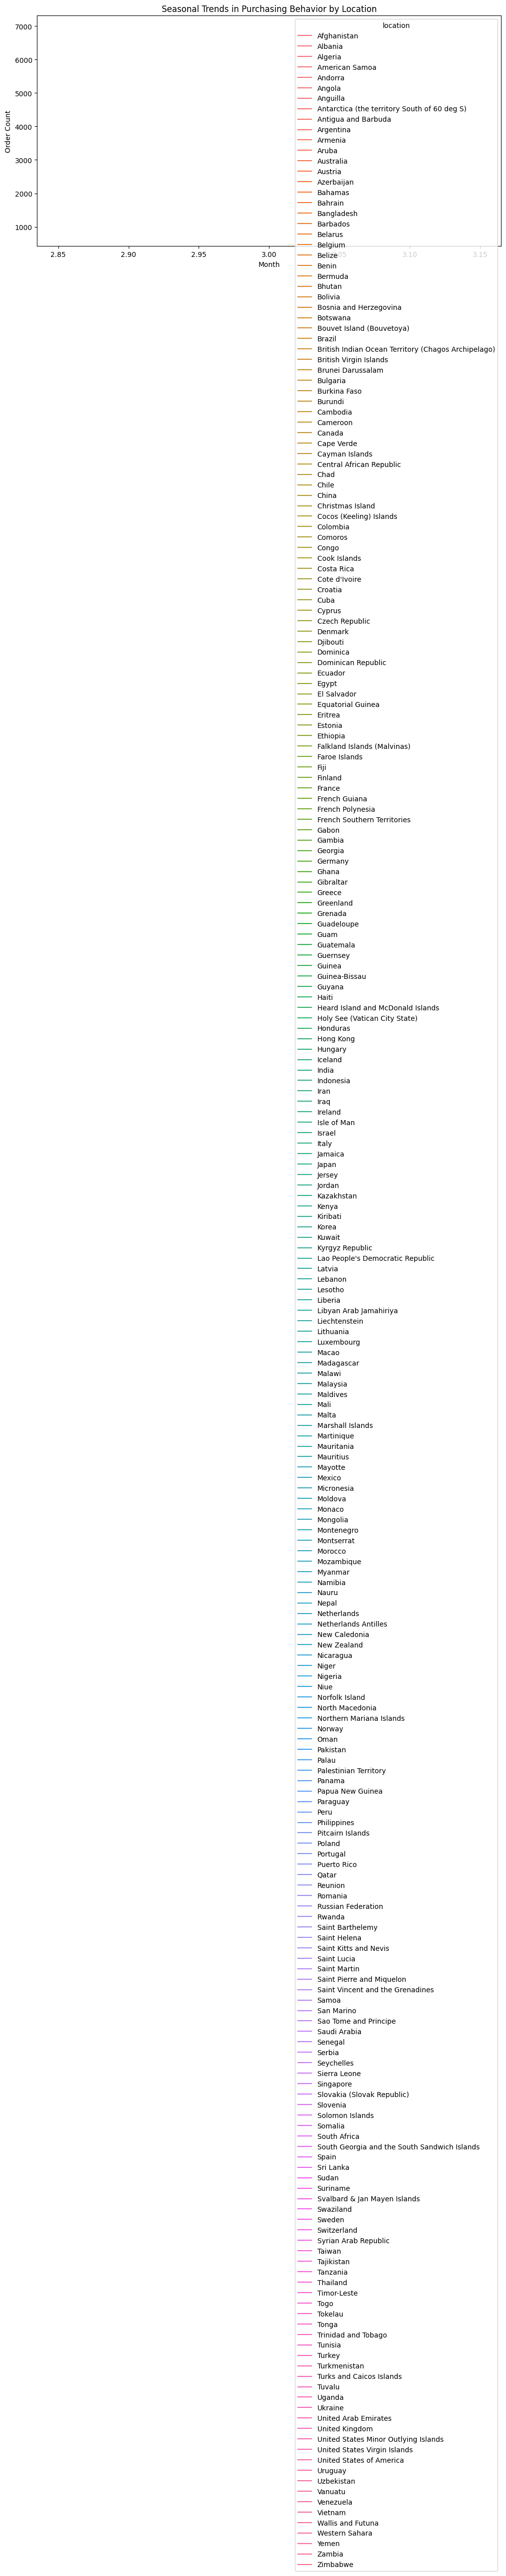

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'seasonal_trends' DataFrame from previous code
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_trends, x='month', y='order_count', hue='location')
plt.title('Seasonal Trends in Purchasing Behavior by Location')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.show()